# US Gun Deaths (2012-2014)

This project undertakes basic statistical analysis on gun deaths over time using data originally obtained from the CDC (https://www.cdc.gov/nchs/data_access/VitalStatsOnline.htm#Mortality_Multiple)

In [1]:
import csv
f = open("guns.csv","r")
data = list(csv.reader(f))
print(data[0:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [2]:
#place headers in one list and data in another
headers = data[0]
data = data[1:len(data)]

In [7]:
#count up deaths by year
years = [i[1] for i in data]
#print(years)
year_counts = {}
for yr in years:
    year = int(yr)
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
print(year_counts)


{2012: 33563, 2013: 33636, 2014: 33599}


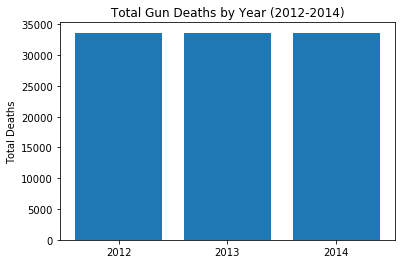

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(len(year_counts)), year_counts.values(), align='center')
plt.xticks(range(len(year_counts)), year_counts.keys())
plt.ylabel("Total Deaths")
plt.title("Total Gun Deaths by Year (2012-2014)")
plt.show()

Gun deaths in the US for the 3 year period were very similar at approximately 33.6K per year.

In [10]:
#store deaths by date in a dictionary style format.  Use list comprenhension to place year and month values into an array.
import datetime
yr = [int(i[1]) for i in data]
mt = [int(i[2]) for i in data]
print(len(yr))
dates = [datetime.datetime(year = yr[i], month = mt[i], day = 1) for i in range(0, len(yr))]
date_counts = {}
for d in dates:
    if d in date_counts:
        date_counts[d] += 1
    else:
        date_counts[d] = 1
#print(date_counts)

100798


In [13]:
sex_counts = {}
race_counts = {}
for row in data:
    if row[5] in sex_counts:
        sex_counts[row[5]] += 1
    else:
        sex_counts[row[5]] = 1
    if row[7] in race_counts:
        race_counts[row[7]] += 1
    else:
        race_counts[row[7]] = 1
print(sex_counts)
print(race_counts)
    

{'M': 86349, 'F': 14449}
{'Asian/Pacific Islander': 1326, 'White': 66237, 'Native American/Native Alaskan': 917, 'Black': 23296, 'Hispanic': 9022}


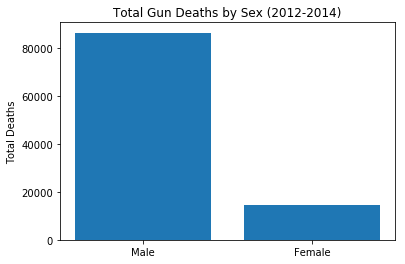

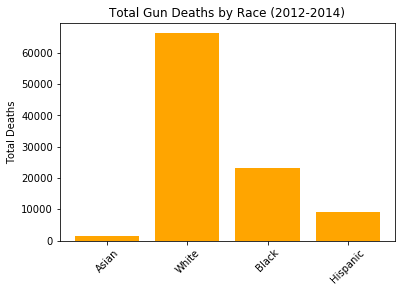

In [44]:
plt.bar(range(len(sex_counts)), sex_counts.values(), align='center')
plt.xticks(range(len(sex_counts)), ["Male","Female"])
plt.ylabel("Total Deaths")
plt.title("Total Gun Deaths by Sex (2012-2014)")
plt.show()

#Do some quick formatting for the race graphs 
def format_race(variable):
    frace_counts = {}
    for key, val in variable.items():
        if key == 'Asian/Pacific Islander':
            frace_counts["Asian"] = variable[key]
        elif key != "Native American/Native Alaskan":
            frace_counts[key]=variable[key]
    return frace_counts
            
frace_counts = format_race(race_counts)             
plt.bar(range(len(frace_counts)), frace_counts.values(), align='center', color="orange")
plt.xticks(range(len(frace_counts)), frace_counts.keys(), rotation=45)
plt.ylabel("Total Deaths")
plt.title("Total Gun Deaths by Race (2012-2014)")
plt.show()

## Analysis so far
The data contains gun deaths in the US from 2012 to 2014.  It documents
the date (year, month), reason for the death (suicide, homicide, other)
plus demographic characteristics (sex, age, race, education) and the
the place of the death (home, street, other).  So far we have counted the numbers of gun deaths over time and by race
and sex.  The analysis shows that males are disproportionately more likely to die from a gun shot.  By race, whites account for the majority of gun deaths.  However, it would be better to deflate these value by population to better identify which race is more likely to die by gun.

## Future analysis
From a policy perspective it is interesting to observe the type of deaths
that occur for different types of sex-age-race-education groups as this can provide some
information on possible prevention programs for different demographic groups.
For example, people that are more prone to suicide may require interventions that try to
address depression.  On the other hand, for those that are more prone to homicide
after figuring out locational characteristics may be in greater need of security 
interventions.


In [32]:
#Read in census data so that we can get values of distribution in sample.
#It is assumed that it is not that problematic to be using 2010 census data since race proportions change relatively slowly
#over time
f2 = open("census.csv","r")
census = list(csv.reader(f2))
print(census)

[['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


In [35]:
#Place race into deaths per 100K
mapping = {}
censusdata = census[1]
print(censusdata)
mapping["Asian/Pacific Islander"] = int(censusdata[15]) + int(censusdata[16])
mapping["Black"] = int(censusdata[12])
mapping["Native American/Native Alaskan"] = int(censusdata[14])
mapping["Hispanic"] = int(censusdata[11])
mapping["White"] = int(censusdata[10])
print(mapping)
race_per_hundredk = {}
for key, cnt in race_counts.items():
    #print(cnt)
    race_per_hundredk[key] = (cnt/mapping[key])*100000
print(race_per_hundredk)


['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']
{'Asian/Pacific Islander': 7658820, 'Black': 40250635, 'Native American/Native Alaskan': 15159516, 'Hispanic': 44618105, 'White': 197318956}
{'Asian/Pacific Islander': 17.313372033811998, 'White': 33.56849303419181, 'Native American/Native Alaskan': 6.049005786200562, 'Black': 57.8773477735196, 'Hispanic': 20.220491210910907}


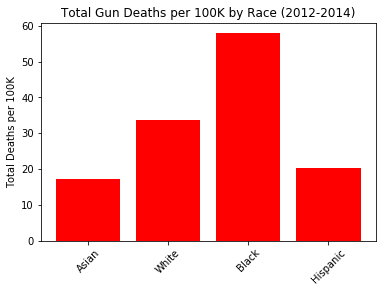

In [46]:
#Do some quick formatting for the graphs
frace_counts = format_race(race_per_hundredk)  
plt.bar(range(len(frace_counts)), frace_counts.values(), align='center', color="red")
plt.xticks(range(len(frace_counts)), frace_counts.keys(), rotation=45)
plt.ylabel("Total Deaths per 100K")
plt.title("Total Gun Deaths per 100K by Race (2012-2014)")
plt.show()

The graph above shows us that blacks suffer the most deaths per 100K at 58 , while whites suffer the next highest rates at 33 per 100K.

In [38]:
#Lets just analyze homicides only per 100K
intents = [i[3] for i in data]
races = [i[7] for i in data]
homicide_race_per_hundredk = {}
for i, race in enumerate(races):
    if intents[i] == "Homicide":
        if races[i] in homicide_race_per_hundredk:
            homicide_race_per_hundredk[races[i]] += 1
        else:
            homicide_race_per_hundredk[races[i]] =1
            
print(homicide_race_per_hundredk)

for race in homicide_race_per_hundredk:
    homicide_race_per_hundredk[race] = (homicide_race_per_hundredk[race]/mapping[race])*100000

print(homicide_race_per_hundredk)

{'White': 9147, 'Asian/Pacific Islander': 559, 'Black': 19510, 'Native American/Native Alaskan': 326, 'Hispanic': 5634}
{'White': 4.6356417981453335, 'Asian/Pacific Islander': 7.298774484842313, 'Black': 48.471284987180944, 'Native American/Native Alaskan': 2.1504644343526533, 'Hispanic': 12.627161104219914}


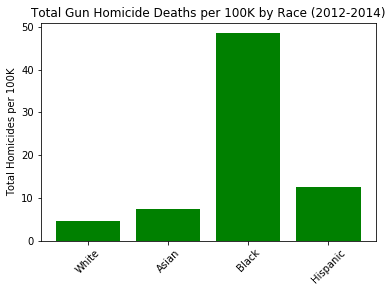

In [47]:
#Do some quick formatting for the graphs
frace_counts = format_race(homicide_race_per_hundredk)  
plt.bar(range(len(frace_counts)), frace_counts.values(), align='center', color="green")
plt.xticks(range(len(frace_counts)), frace_counts.keys(), rotation=45)
plt.ylabel("Total Homicides per 100K")
plt.title("Total Gun Homicide Deaths per 100K by Race (2012-2014)")
plt.show()

# Results on Homicides per Race

Blacks have the highest number of homicides per 100,000 at 48.4.  This amount is nearly 4 times larger than Hispanics homicides per 100,000 which has the second highest rates of homicides and nearly 10 times larger than White races that have a homicide per 100,000 count of 4.6.  Asian/Pacific Islanders have a higher count than Whites at 7.3, but is lower than Hispanics.

# Next steps

From a policy perspective it would be useful to also examine homicide counts by race-gender and to examine how suicide counts differ among races and gender.

In [55]:
#Create function that computes the number of deaths for any two variables

def count_deaths (intent, var1):
    count_intent_var1 = {}
    for i, v in enumerate(var1):
        if intents[i] == intent or intent == "All":
            if var1[i] in count_intent_var1:
                count_intent_var1[var1[i]] += 1
            else:
                count_intent_var1[var1[i]] = 1
    return (count_intent_var1)

#Counts of homicides by month
#print(mt)
count_homicide_month = count_deaths("Homicide",mt)
print(count_homicide_month)

#Counts of homicides by gender
genders = [i[5] for i in data]
count_homicide_gender = count_deaths("Homicide",genders)
print(count_homicide_gender)

#Accidental by gender and race
count_accidental_gender = count_deaths("Accidental",genders)
print(count_accidental_gender)

count_accidental_race = count_deaths("Accidental",races)
print(count_accidental_race)

#Suicide by gender and race
count_suicide_gender = count_deaths("Suicide",genders)
print(count_suicide_gender)

count_suicide_race = count_deaths("Suicide",races)
print(count_accidental_race)
suicide_race_per_hundredk = {}
for key, cnt in count_suicide_race.items():
    suicide_race_per_hundredk[key] = (cnt/mapping[key])*100000

#Examine if gun death rates correlated to location and education
location = [i[9] for i in data]
education = [i[10] for i in data]
count_alldeaths_location = count_deaths("All",location)
count_alldeaths_education = count_deaths("All",education)
print(count_alldeaths_location, count_alldeaths_education)

{3: 2780, 4: 2845, 6: 3130, 7: 3269, 8: 3125, 9: 2966, 10: 2968, 12: 3191, 1: 2829, 2: 2178, 5: 2976, 11: 2919}
{'M': 29803, 'F': 5373}
{'M': 1421, 'F': 218}
{'White': 1132, 'Black': 328, 'Hispanic': 145, 'Asian/Pacific Islander': 12, 'Native American/Native Alaskan': 22}
{'M': 54486, 'F': 8689}
{'White': 1132, 'Black': 328, 'Hispanic': 145, 'Asian/Pacific Islander': 12, 'Native American/Native Alaskan': 22}
{'Home': 60486, 'Street': 11151, 'Other specified': 13751, 'NA': 1384, 'Other unspecified': 8867, 'Trade/service area': 3439, 'Farm': 470, 'Industrial/construction': 248, 'School/instiution': 671, 'Sports': 128, 'Residential institution': 203} {'4': 12946, '3': 21680, '2': 42927, '1': 21823, '5': 1369, 'NA': 53}


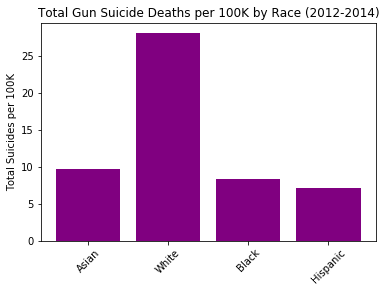

In [54]:
frace_counts = format_race(suicide_race_per_hundredk) 
plt.bar(range(len(frace_counts)), frace_counts.values(), align='center', color="purple")
plt.xticks(range(len(frace_counts)), frace_counts.keys(), rotation=45)
plt.ylabel("Total Suicides per 100K")
plt.title("Total Gun Suicide Deaths per 100K by Race (2012-2014)")
plt.show()

Graph above shows that of the various races whites are the most likely to commit gun suicides.

## Future Analysis

Additional analysis should try to add in a longer time span of data (e.g. 2005 -2015).  This might then provide show some revealing patterns due to the global economic crises.  In particular, does gun deaths or suicide deaths typically peak during worse economic times?  Are there more gun deaths during the holidays when there is greater pressure to spend?